(16.0,)
(4.0,)
(4.0,)
(5.0,)
(5.0,)
(5.0,)
(5.0,)
(6.0,)
(6.0,)
(6.0,)
(6.0,)
(6.0,)
(6.0,)
(6.0,)
(7.0,)
(7.0,)
(7.0,)
(7.0,)
(7.0,)
(7.0,)
(8.0,)
(8.0,)
(8.0,)
(9.0,)
(9.0,)
(9.0,)
(9.0,)
(9.0,)
(9.0,)
(9.0,)
(9.0,)
(9.0,)
(10.0,)
(10.0,)
(10.0,)
(10.0,)
(10.0,)
(10.0,)
(10.0,)
(11.0,)
(11.0,)
(11.0,)
(11.0,)
(11.0,)
(12.0,)
(12.0,)
(12.0,)
(12.0,)
(13.0,)
(15.0,)


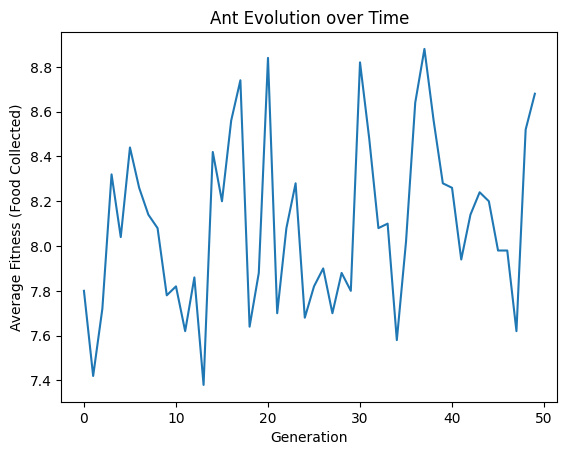

In [48]:
#max function
import random
import matplotlib.pyplot as plt
import numpy as np
from deap import base, creator, tools

# Define grid (food locations)
GRID = [
    [0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
    [1, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
]

# Avoid recreating DEAP classes if already defined
if not hasattr(creator, "FitnessMax"):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
if not hasattr(creator, "Individual"):
    creator.create("Individual", list, fitness=creator.FitnessMax)

# Mutation function
def mutates(individual, indpb=0.2):
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] = random.randint(-1, 1)
    return individual,

# Fitness evaluation function
def evaluate(individual, size):
    direction = 1  # 0: up, 1: right, 2: down, 3: left
    food_collected = 0
    x_pos, y_pos = 0, 0
    counted = []

    for move in individual:
        direction = (move + direction) % 4
        if direction == 0 and y_pos > 0:
            y_pos -= 1
        elif direction == 1 and x_pos < size - 1:
            x_pos += 1
        elif direction == 2 and y_pos < size - 1:
            y_pos += 1
        elif direction == 3 and x_pos > 0:
            x_pos -= 1

        if GRID[y_pos][x_pos] == 1 and [x_pos, y_pos] not in counted:
            food_collected += 1
            counted.append([x_pos, y_pos])

    return food_collected,

# DEAP toolbox setup
toolbox = base.Toolbox()
toolbox.register("steps", random.randint, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.steps, 50)
toolbox.register("mutate", mutates, indpb=0.2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate, size=len(GRID))

# Main evolution loop
def main():
    pop = toolbox.population(n=50)
    MUTPB, NGEN = 0.2, 50
    total_weights = []

    # Initial evaluation
    for ind, fit in zip(pop, map(toolbox.evaluate, pop)):
        ind.fitness.values = fit

    for g in range(NGEN):
        offspring = list(map(toolbox.clone, toolbox.select(pop, len(pop))))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

        for mutant in offspring:
            toolbox.mutate(mutant)
            del mutant.fitness.values

        # Re-evaluate invalid individuals
        for ind, fit in zip(
            [ind for ind in offspring if not ind.fitness.valid],
            map(toolbox.evaluate, [ind for ind in offspring if not ind.fitness.valid])
        ):
            ind.fitness.values = fit

        # Elitism: keep best from previous generation
        best_ind = max(pop, key=lambda ind: ind.fitness.values)
        pop[:] = offspring
        pop.sort(key=lambda ind: ind.fitness.values)
        pop[0] = best_ind

        # Record average fitness
        avg = sum(ind.fitness.values[0] for ind in pop) / len(pop)
        total_weights.append(avg)

    # Print fitnesses
    for ind in pop:
        print(ind.fitness.values)

    # Plot
    plt.plot(range(NGEN), total_weights)
    plt.xlabel("Generation")
    plt.ylabel("Average Fitness (Food Collected)")
    plt.title("Ant Evolution over Time")
    plt.show()

if __name__ == "__main__":
    main()



(19.0,)
(3.0,)
(4.0,)
(6.0,)
(11.0,)
(12.0,)
(15.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(20.0,)


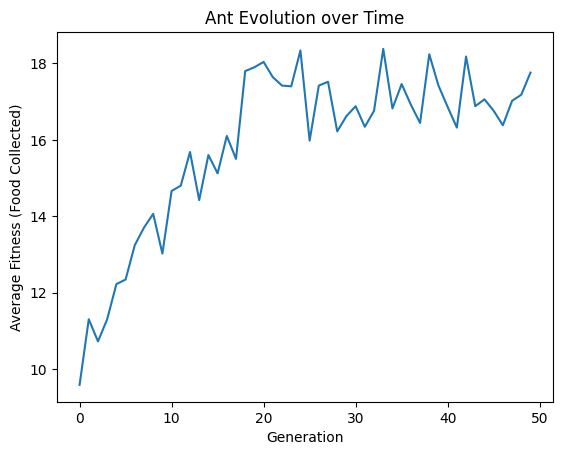

In [1]:
#crossover
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools

# Define grid (food locations)
GRID = [
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
    [1, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
]

# DEAP setup
if not hasattr(creator, "FitnessMax"):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
if not hasattr(creator, "Individual"):
    creator.create("Individual", list, fitness=creator.FitnessMax)

def mutates(individual, indpb=0.2):
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] = random.randint(-1, 1)
    return individual,

def evaluate(individual, size):
    direction = 1  # 0=up, 1=right, 2=down, 3=left
    food_collected = 0
    x_pos, y_pos = 0, 0
    counted = []

    for move in individual:
        direction = (move + direction) % 4
        if direction == 0 and y_pos > 0:
            y_pos -= 1
        elif direction == 1 and x_pos < size - 1:
            x_pos += 1
        elif direction == 2 and y_pos < size - 1:
            y_pos += 1
        elif direction == 3 and x_pos > 0:
            x_pos -= 1

        if GRID[y_pos][x_pos] == 1 and [x_pos, y_pos] not in counted:
            food_collected += 1
            counted.append([x_pos, y_pos])

    return food_collected,

toolbox = base.Toolbox()
toolbox.register("steps", random.randint, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.steps, 50)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mutate", mutates, indpb=0.2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate, size=len(GRID))

def main():
    pop = toolbox.population(n=50)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 50
    total_weights = []

    # Evaluate initial population
    for ind in pop:
        ind.fitness.values = toolbox.evaluate(ind)

    for g in range(NGEN):
        offspring = list(map(toolbox.clone, toolbox.select(pop, len(pop))))

        # Apply crossover with probability
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        # Apply mutation
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Re-evaluate individuals with invalid fitness
        invalids = [ind for ind in offspring if not ind.fitness.valid]
        for ind in invalids:
            ind.fitness.values = toolbox.evaluate(ind)

        # Elitism
        best_ind = max(pop, key=lambda ind: ind.fitness.values)
        pop[:] = offspring
        pop.sort(key=lambda ind: ind.fitness.values)
        pop[0] = best_ind

        # Record average fitness
        avg = sum(ind.fitness.values[0] for ind in pop) / len(pop)
        total_weights.append(avg)

    # Output results
    for ind in pop:
        print(ind.fitness.values)

    plt.plot(range(NGEN), total_weights)
    plt.xlabel("Generation")
    plt.ylabel("Average Fitness (Food Collected)")
    plt.title("Ant Evolution over Time")
    plt.show()

if __name__ == "__main__":
    main()


(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)
(19.0,)


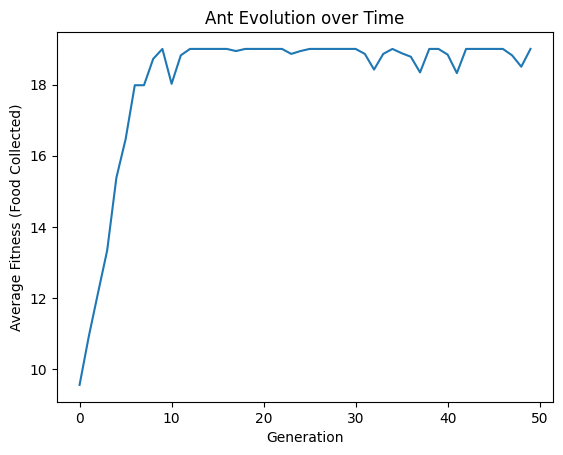

In [2]:
#elitism changed 

import random
import matplotlib.pyplot as plt
from deap import base, creator, tools

# Define grid (food locations)
GRID = [
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
    [1, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
]

# DEAP setup
if not hasattr(creator, "FitnessMax"):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
if not hasattr(creator, "Individual"):
    creator.create("Individual", list, fitness=creator.FitnessMax)

def mutates(individual, indpb=0.2):
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] = random.randint(-1, 1)
    return individual,

def evaluate(individual, size):
    direction = 1  # 0=up, 1=right, 2=down, 3=left
    food_collected = 0
    x_pos, y_pos = 0, 0
    counted = []

    for move in individual:
        direction = (move + direction) % 4
        if direction == 0 and y_pos > 0:
            y_pos -= 1
        elif direction == 1 and x_pos < size - 1:
            x_pos += 1
        elif direction == 2 and y_pos < size - 1:
            y_pos += 1
        elif direction == 3 and x_pos > 0:
            x_pos -= 1

        if GRID[y_pos][x_pos] == 1 and [x_pos, y_pos] not in counted:
            food_collected += 1
            counted.append([x_pos, y_pos])

    return food_collected,

toolbox = base.Toolbox()
toolbox.register("steps", random.randint, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.steps, 50)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mutate", mutates, indpb=0.2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate, size=len(GRID))

def main():
    pop = toolbox.population(n=50)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 50
    total_weights = []

    # Evaluate initial population
    for ind in pop:
        ind.fitness.values = toolbox.evaluate(ind)

    for g in range(NGEN):
        offspring = list(map(toolbox.clone, toolbox.select(pop, len(pop))))

        # Apply crossover with probability
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        # Apply mutation
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Re-evaluate individuals with invalid fitness
        invalids = [ind for ind in offspring if not ind.fitness.valid]
        for ind in invalids:
            ind.fitness.values = toolbox.evaluate(ind)

        # Elitism: keep top N elites from previous generation
        N_ELITES = 10
        elites = tools.selBest(pop, N_ELITES)

        pop[:] = offspring

        # Reinsert elite individuals
        pop.sort(key=lambda ind: ind.fitness.values)
        pop[:N_ELITES] = elites

        # Record average fitness
        avg = sum(ind.fitness.values[0] for ind in pop) / len(pop)
        total_weights.append(avg)

    # Output results
    for ind in pop:
        print(ind.fitness.values)

    plt.plot(range(NGEN), total_weights)
    plt.xlabel("Generation")
    plt.ylabel("Average Fitness (Food Collected)")
    plt.title("Ant Evolution over Time")
    plt.show()

if __name__ == "__main__":
    main()
